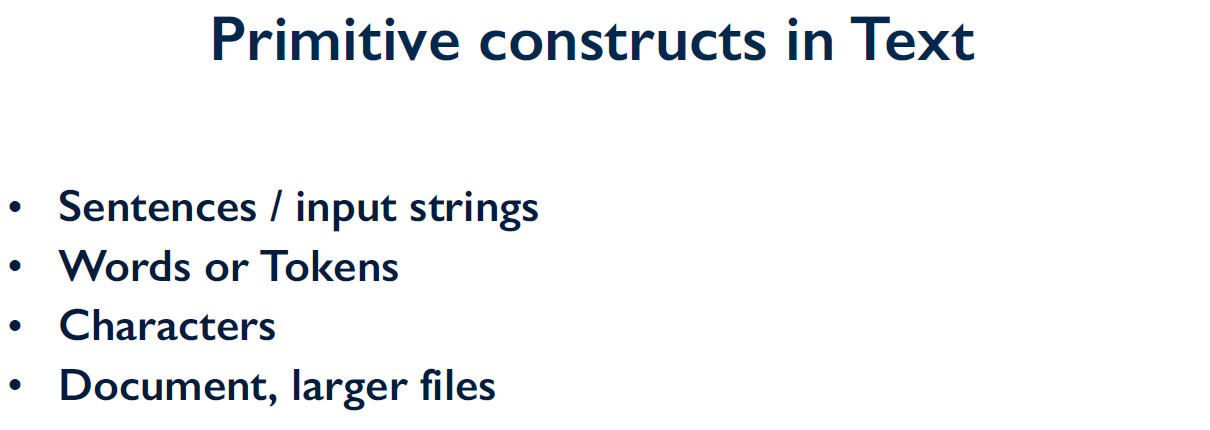

In [8]:
text1 = "Ethics are built right into the ideals and objectives of the United Nations "
len(text1)

76

In [9]:
text2 = text1.split(' ')
len(text2)

14

In [10]:
text2

['Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations',
 '']

#### Find specific words using List comprehension

In [11]:
# Long words: words that are more than 3 letters long
[w for w in text2 if len(w) > 3]

['Ethics',
 'built',
 'right',
 'into',
 'ideals',
 'objectives',
 'United',
 'Nations']

In [12]:
# Capitalized words
[w for w in text2 if w.istitle()]

['Ethics', 'United', 'Nations']

In [13]:
# Words that end with s
[w for w in text2 if w.endswith('s')]

['Ethics', 'ideals', 'objectives', 'Nations']

#### Find unique words using set()

In [14]:
text3 = 'To be or not to be'
text4 = text3.split(' ')
len(text4)

6

In [15]:
len(set(text4))

5

In [16]:
set(text4)

{'To', 'be', 'not', 'or', 'to'}

In [17]:
set([w.lower() for w in text4])


{'be', 'not', 'or', 'to'}

In [18]:
len(set([w.lower() for w in text4]))

4

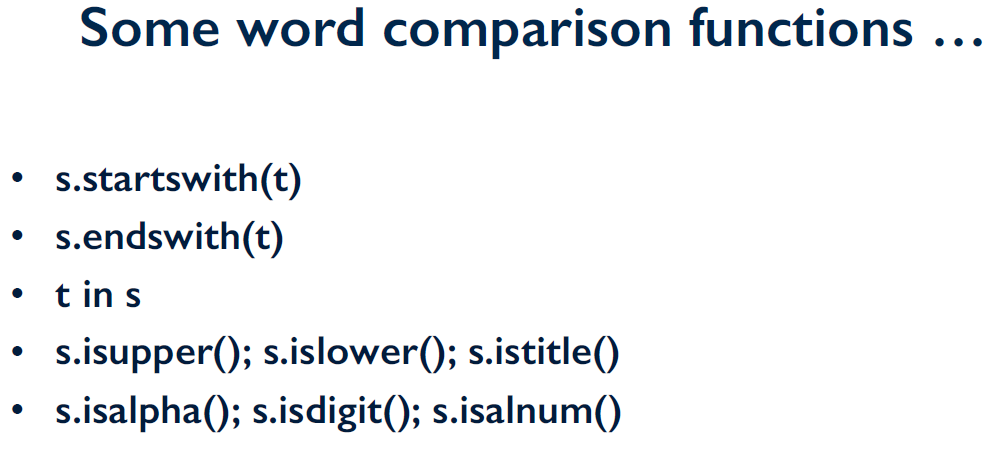

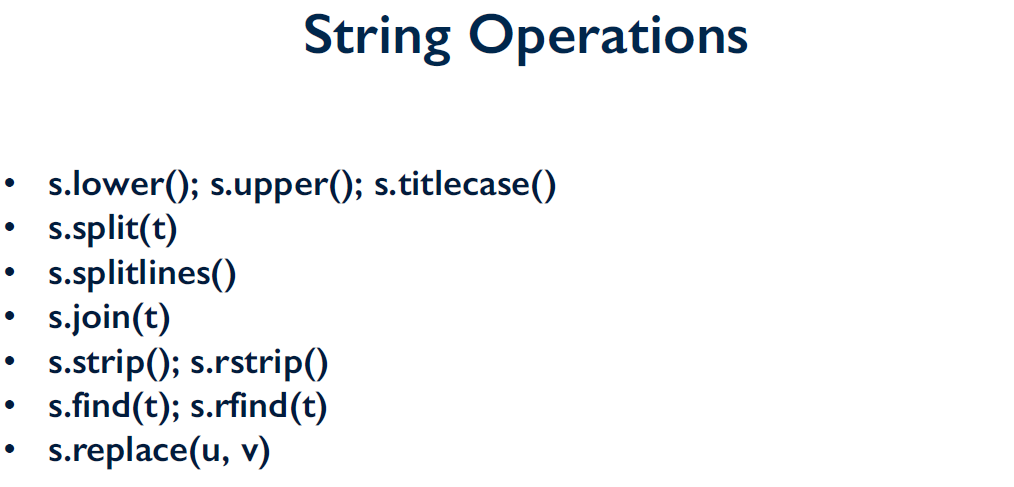

#### From words to characters

In [19]:
text5 = 'ouagadougou'
text6 = text5.split('ou')
text6

['', 'agad', 'g', '']

In [20]:
'ou'.join(text6)

'ouagadougou'

In [21]:
# To get list of all characters in string
list(text5)

# or use [c for c in text5]

['o', 'u', 'a', 'g', 'a', 'd', 'o', 'u', 'g', 'o', 'u']

#### Cleaning Text

In [22]:
text8 = ' A quick brown fox jumped over the lazy dog. '
text8.split(' ')  # Has residual white spaces

['', 'A', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog.', '']

In [23]:
text9 = text8.strip()  # removes white spaces
text9.split(' ')

['A', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog.']

#### Changing Text

In [24]:
# Find Character
print(text9)
text9.find('o')  # Gives index from left of first character found from left

A quick brown fox jumped over the lazy dog.


10

In [25]:
text9.rfind('o')  # Gives index from left of first character from right

40

In [26]:
# Find And Replace
text9.replace('o', 'O')

'A quick brOwn fOx jumped Over the lazy dOg.'

#### Handling Larger Texts

In [27]:
# Reading files line by line
f = open('UNDHR.txt', 'r')
f.readline()

'Universal Declaration of Human Rights \n'

In [28]:
# Reading the Full file
f.seek(0)
text12 = f.read()
len(text12)

10910

In [29]:
text13 = text12.splitlines()
len(text13)

91

In [30]:
text13[0].strip()

'Universal Declaration of Human Rights'

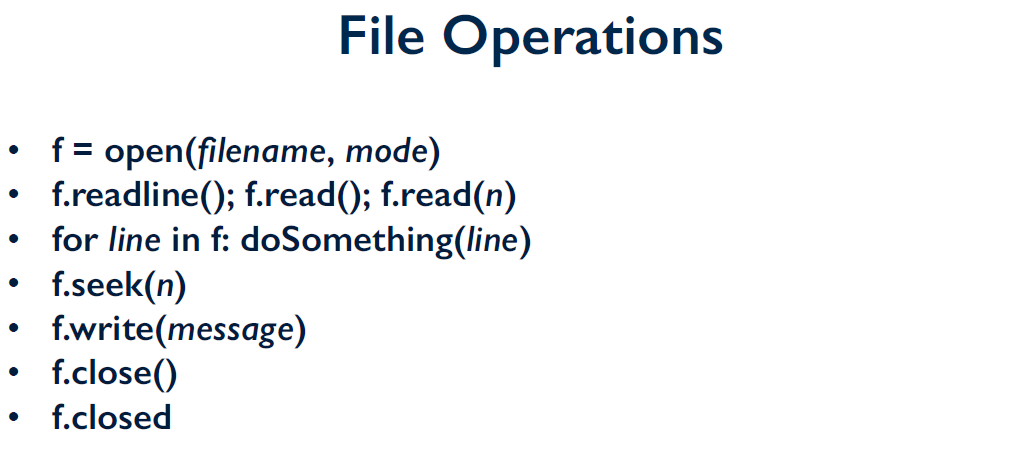

### Processing free-text

In [31]:
text5 = '"Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr @UN @UN_Women'
text6 = text5.split(' ')

text6

['"Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations"',
 '#UNSG',
 '@',
 'NY',
 'Society',
 'for',
 'Ethical',
 'Culture',
 'bit.ly/2guVelr',
 '@UN',
 '@UN_Women']

Finding hastags:

In [32]:
[w for w in text6 if w.startswith('#')]

['#UNSG']

Finding callouts:

In [33]:
[w for w in text6 if w.startswith('@')]

['@', '@UN', '@UN_Women']

<br>

We can use regular expressions to help us with more complex parsing. 

For example `'@[A-Za-z0-9_]+'` will return all words that: 
* start with `'@'` and are followed by at least one: 
* capital letter (`'A-Z'`)
* lowercase letter (`'a-z'`) 
* number (`'0-9'`)
* or underscore (`'_'`)

In [34]:
import re # import re - a module that provides support for regular expressions

[w for w in text6 if re.search('@[A-Za-z0-9_]+', w)]

['@UN', '@UN_Women']

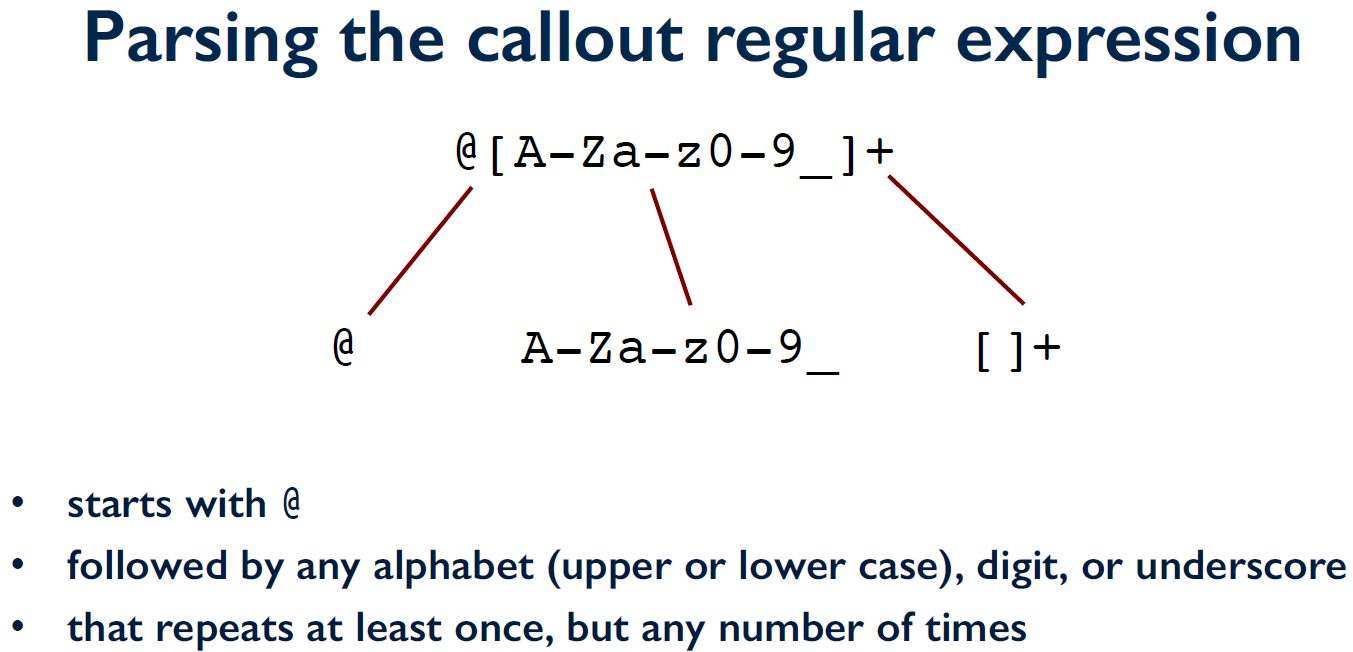

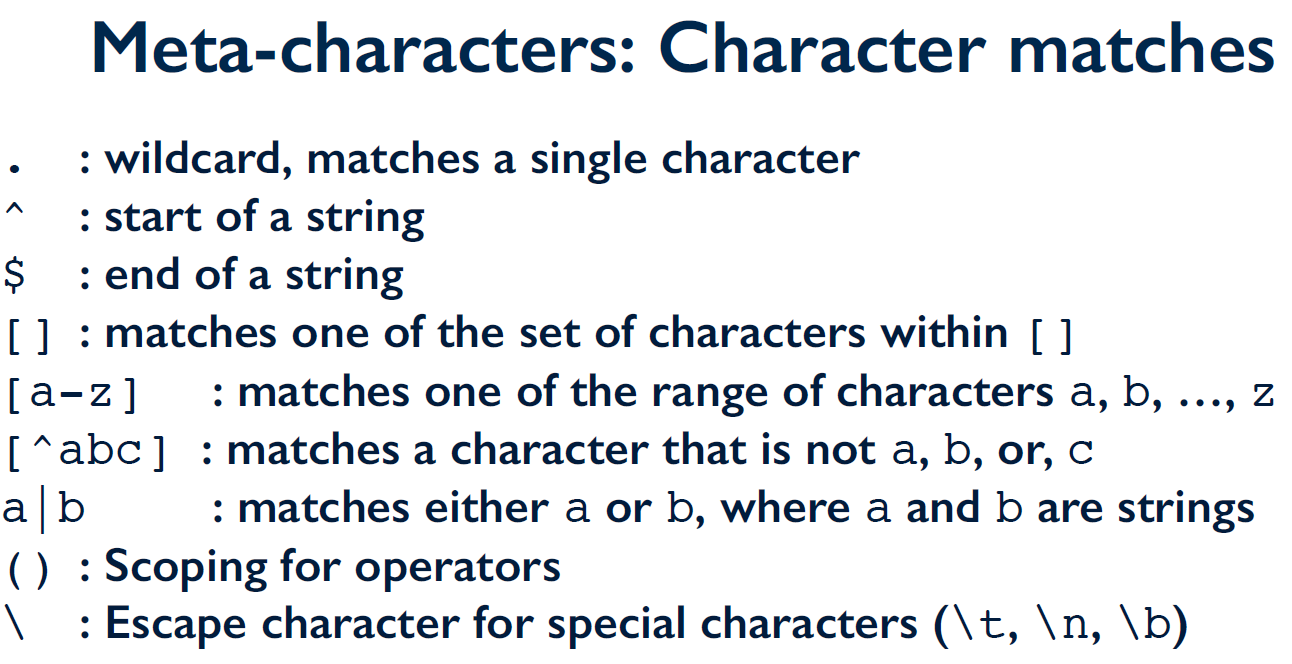

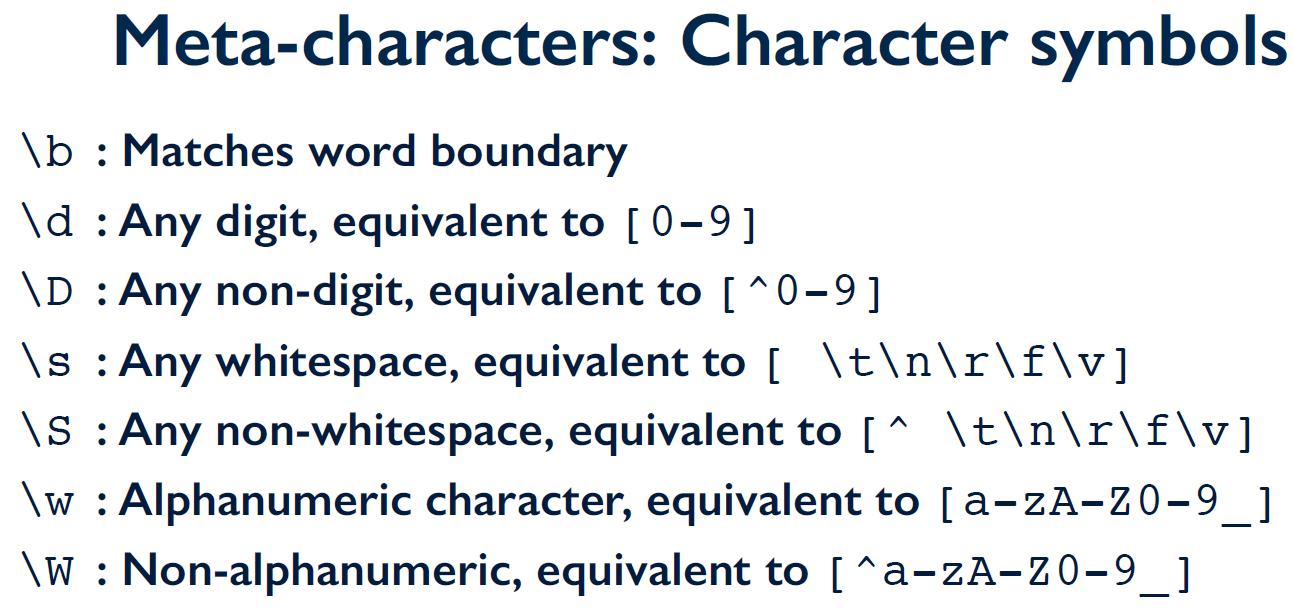

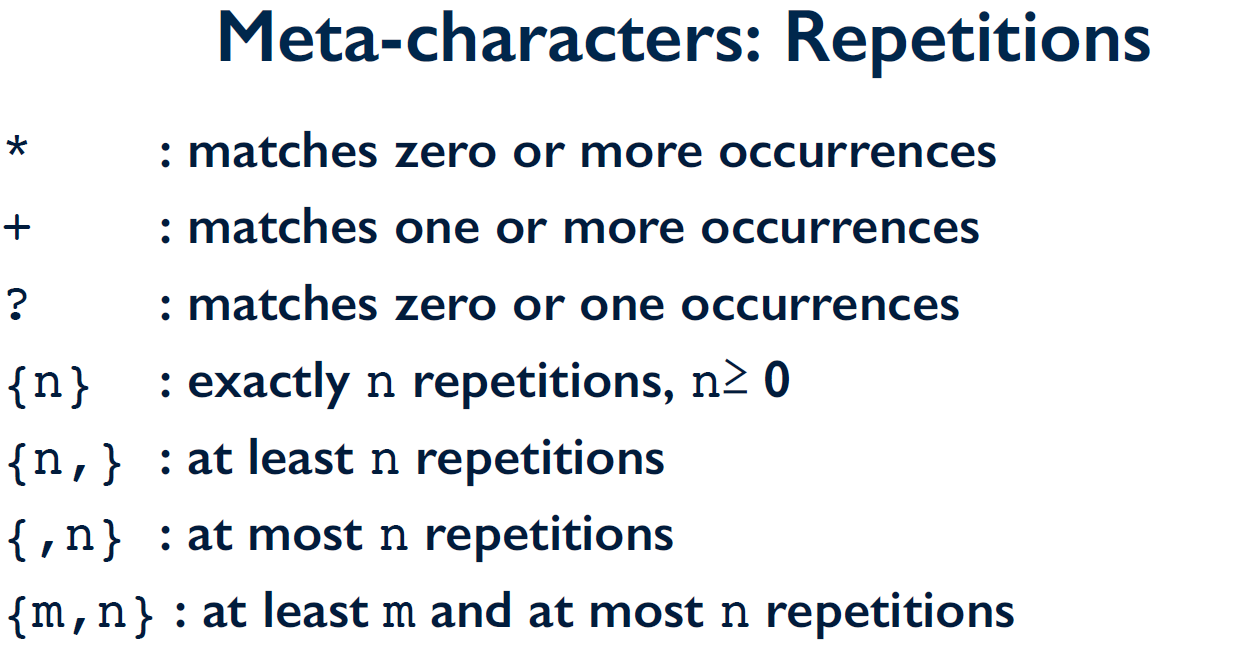

Recall the Callout RegEx:

In [35]:
text10 = '"Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr @UN @UN_Women'
text11 = text10.split(' ')

In [36]:
import re # import re - a module that provides support for regular expressions

[w for w in text11 if re.search('@[A-Za-z0-9_]+', w)]

['@UN', '@UN_Women']

In [37]:
[w for w in text11 if re.search('@\w', w)] # the \w equivalent to [A-Za-z0-9_]

['@UN', '@UN_Women']

#### Look at some more examples: 
Finding Specific characters

In [38]:
text12 = 'ouagadougou'
re.findall('[aeiou]', text12)

['o', 'u', 'a', 'a', 'o', 'u', 'o', 'u']

In [39]:
re.findall('[^aeiou]', text12) # NOT aeiou

['g', 'd', 'g']

#### Case Study: RegEx for Dates

Date Variations for 23rd October 2002

23-10-2002

23/10/2002

23/10/02

10/23/2002

23 Oct 2002

23 October 2002

Oct 23, 2002

October 23, 2002

In [40]:
dateStr = '23-10-2002\n23/10/2002\n23/10/02\n10/23/2002\n23 Oct 2002\n23 October 2002\nOct 23, 2002\nOctober 23, 2002'

In [41]:
re.findall('\d{2}[/-]\d{2}[/-]\d{4}', dateStr)

['23-10-2002', '23/10/2002', '10/23/2002']

In [42]:
re.findall('\d{2}[/-]\d{2}[/-]\d{2,4}', dateStr)

['23-10-2002', '23/10/2002', '23/10/02', '10/23/2002']

In [43]:
re.findall('\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', dateStr)

['23-10-2002', '23/10/2002', '23/10/02', '10/23/2002']

In [44]:
re.findall('\d{2} (Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{4}', dateStr)

['Oct']

In [45]:
re.findall('\d{2} (?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{4}', dateStr)

['23 Oct 2002']

In [46]:
re.findall('\d{2} (?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* \d{4}', dateStr)

['23 Oct 2002', '23 October 2002']

In [47]:
re.findall('(?:\d{2} )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:\d{2}, )?\d{4}', dateStr)

['23 Oct 2002', '23 October 2002', 'Oct 23, 2002', 'October 23, 2002']

In [48]:
re.findall('(?:\d{1,2} )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:\d{1,2}, )?\d{4}', dateStr)

['23 Oct 2002', '23 October 2002', 'Oct 23, 2002', 'October 23, 2002']

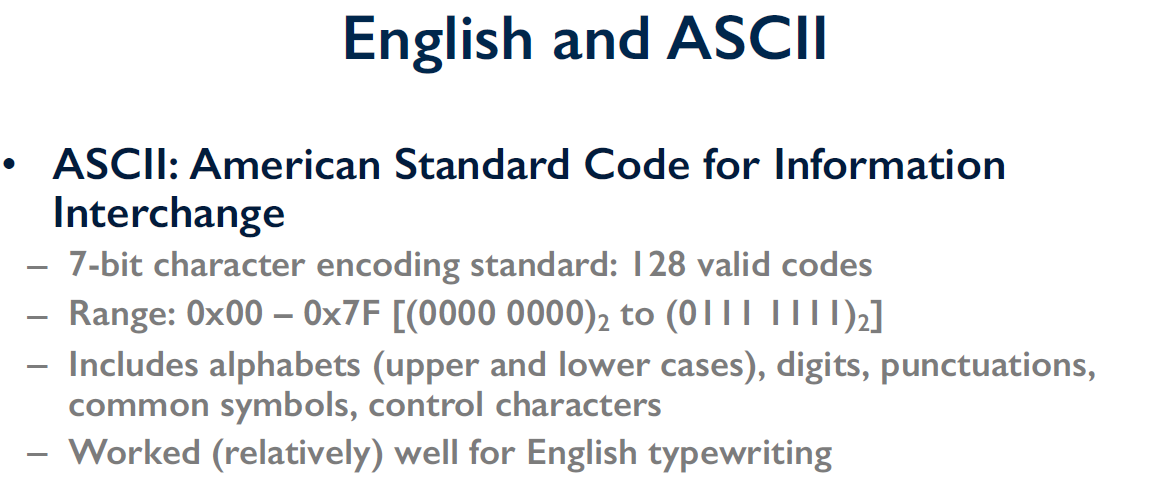

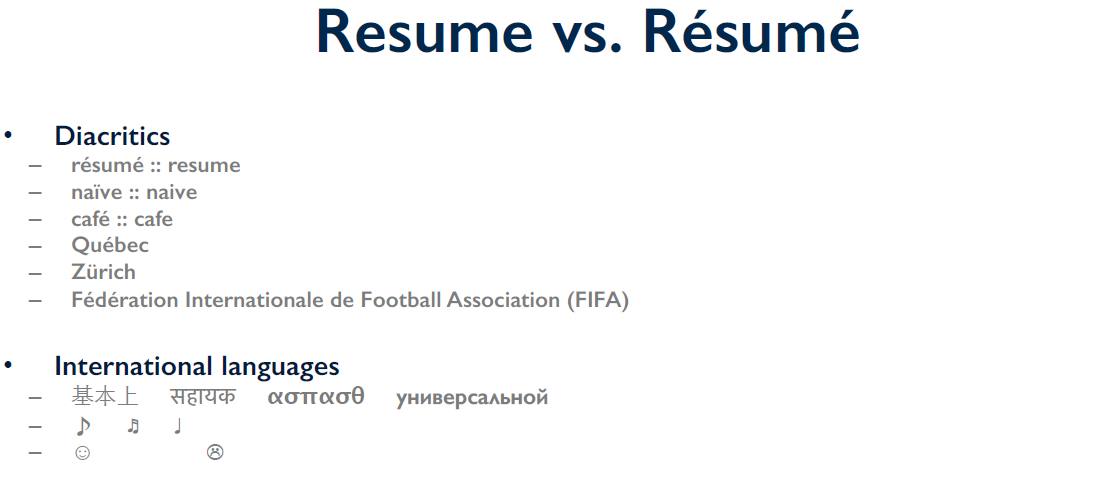

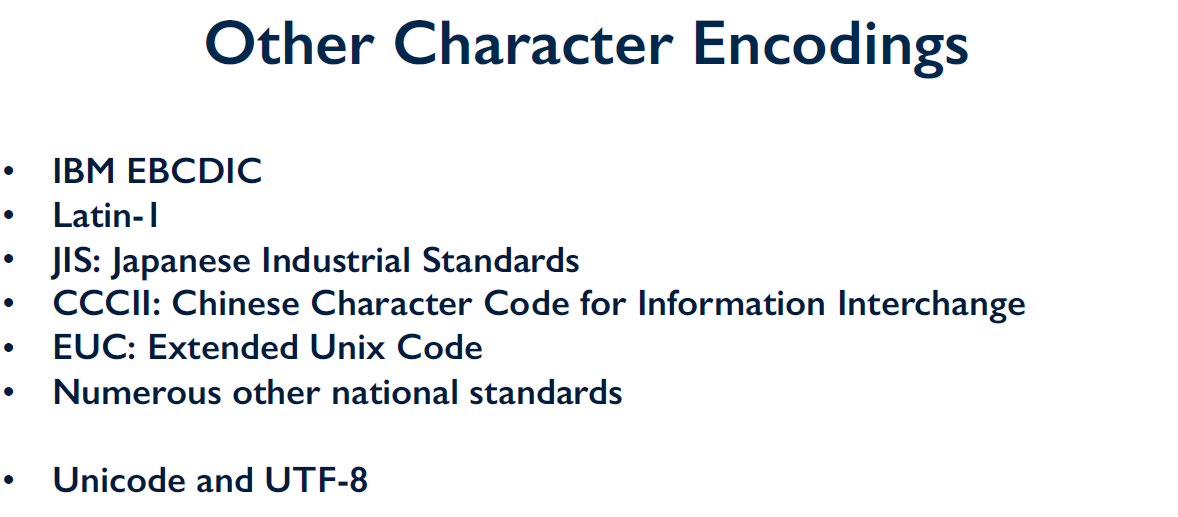

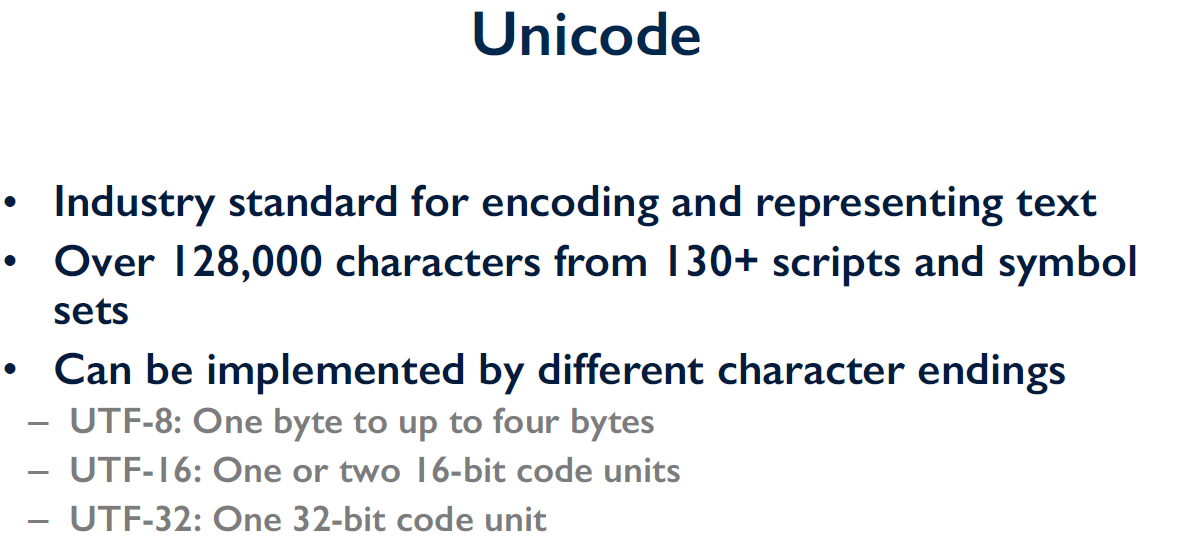

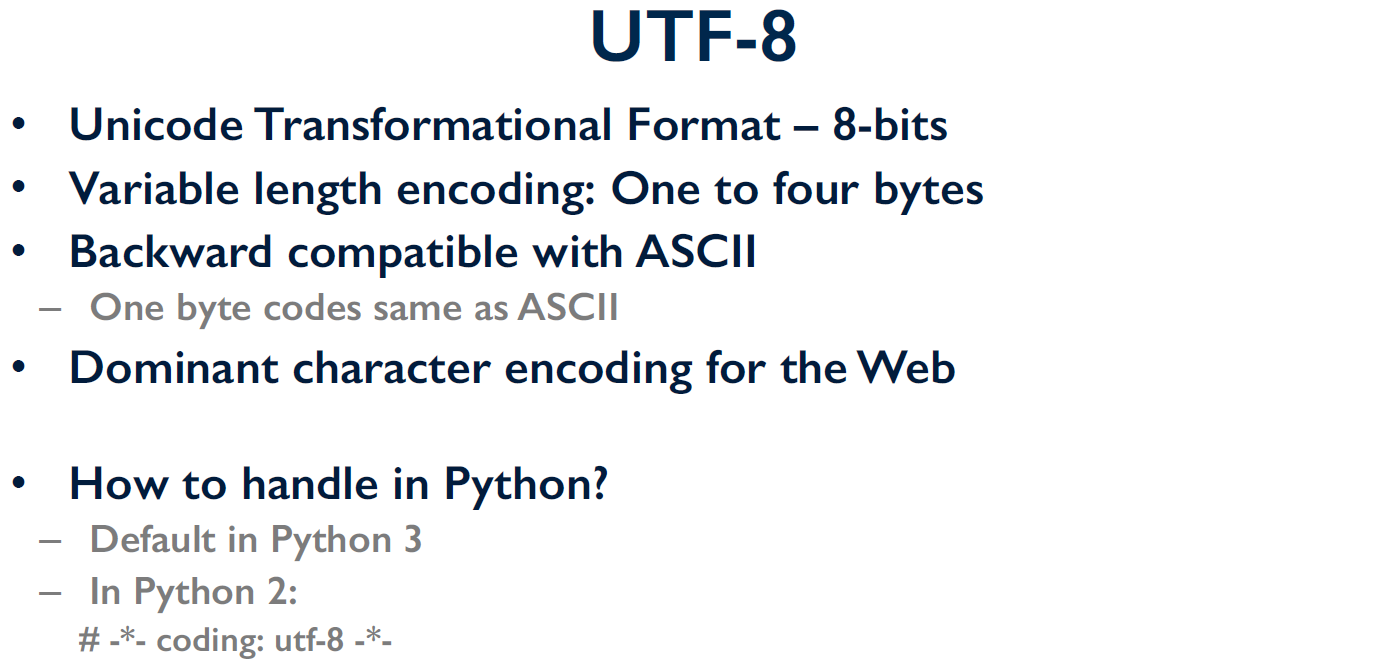

In [49]:
text1 = "Résumé"
len(text1)

6

In [50]:
text1

'Résumé'

In [51]:
[c for c in text1]

['R', 'é', 's', 'u', 'm', 'é']